<a href="https://colab.research.google.com/github/ManikantaSanjay/Financial_Analysis_Using_Python_and_ML_Libraries/blob/main/Capital_Asset_Pricing_Model_(CAPM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TASK #1: UNDERSTANDING THE THEORY AND INTUITION BEHIND CAPITAL ASSET PRICING MODEL (CAPM)

![alt text](https://drive.google.com/uc?id=1rGljEUj4EEwo4Y9vzuXjM2le_tGC1NFy)

![alt text](https://drive.google.com/uc?id=1BYrA8caoVBNS0ZZusSas0u5y_o8N4c3f)

![alt text](https://drive.google.com/uc?id=1M5TERDwqNNTbV1a-_fLKWvdGcxHqNdKF)

![alt text](https://drive.google.com/uc?id=1KLHifTx79y-e2xrNPSZ-wY2tCrZEzVZC)

![alt text](https://drive.google.com/uc?id=1LIM_wMcQjcOh-4U3h_NXYM6fIborwJTp)

![alt text](https://drive.google.com/uc?id=1j8HYfvy6Gn0v3a8z5cnuL4p-CvcVa8Va)

![alt text](https://drive.google.com/uc?id=1_9Tw_D0MRDnbZ7huDDfnJbbhHZVhFvPb)

# TASK #2: IMPORT LIBRARIES/DATASETS AND VISUALIZE STOCKS DATA

In [17]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [18]:
# Read the stock data file
stocks_df = pd.read_csv('/content/sample_data/stock.csv')
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [19]:
# Sort the data based on Date
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [20]:
def normalize(df):
    """Normalize the prices based on the initial price for each stock.

    This function takes a dataframe where each column represents a stock and
    rows represent chronological data points (e.g., daily closing prices).
    The function normalizes the price data for each stock based on its initial
    price (i.e., the price at the first data point), resulting in a normalized
    price series starting from 1.

    Args:
        df (pandas.DataFrame): dataframe with each column representing a
        stock and each row a data point in chronological order

    Returns:
        pandas.DataFrame: dataframe with normalized price data. Each column
        is a time series of price data normalized to the initial price.
    """
    # Copy the dataframe to avoid modifying the original data
    df_normalized = df.copy()

    # Normalize prices for each stock (column)
    for column in df.columns:
        # Attempt to convert the data to float
        try:
            df_normalized[column] = df_normalized[column].astype(float)
        except ValueError:
            print(f"Cannot convert column '{column}' to numeric data type. Skipping this column.")
            continue

        # Divide each price by the first price in the series and multiply by 100
        # This results in a series where the first price is 100 and subsequent prices are
        # relative to the first price.
        df_normalized[column] = df_normalized[column] / df_normalized[column].iloc[0] * 100

    return df_normalized

# TASK #3: CALCULATE DAILY RETURNS

In [21]:
def calculate_daily_return(df):
    """Calculate daily return for each stock in the dataframe

    This function takes a dataframe where each column represents a stock and
    rows represent chronological data points (e.g., daily closing prices).
    The function calculates daily returns, defined as the percentage change
    in a stock's value from the previous day.

    Args:
        df (pandas.DataFrame): dataframe with each column representing a
        stock and each row a data point in chronological order

    Returns:
        pandas.DataFrame: dataframe with daily returns. First row is set
        to NaN as there is no previous day for the first data point.
    """
    # Copy the dataframe to avoid modifying the original data
    df_daily_return = df.copy()

    # Calculate the daily return for each stock (column)
    for column in df.columns:
        # Attempt to convert the data to float
        try:
            df_daily_return[column] = df_daily_return[column].astype(float)
        except ValueError:
            print(f"Cannot convert column '{column}' to numeric data type. Skipping this column.")
            continue

        # The shift(1) function moves the data down one row. By subtracting the shifted
        # data from the original data, we get the daily change. Dividing by the shifted
        # data then gives us the daily return (as a percentage).
        df_daily_return[column] = (df_daily_return[column] / df_daily_return[column].shift(1) - 1) * 100

        df_daily_return = df_daily_return.fillna(0)

    return df_daily_return

In [22]:
# Get the daily returns
stocks_daily_return = calculate_daily_return(stocks_df)
stocks_daily_return

Cannot convert column 'Date' to numeric data type. Skipping this column.


,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2012-01-13,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2,2012-01-17,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
3,2012-01-18,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793
4,2012-01-19,-0.316937,0.666134,0.296736,0.549882,2.644634,-0.303752,-0.186494,1.052283,0.493866
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,0.362467,5.579446,-0.533156,0.000000,2.109065,-0.309917,-0.133153,0.589774,0.642974
2155,2020-08-06,3.488923,-1.193483,-0.033501,10.406699,0.623082,0.534082,0.307062,1.797626,0.642770
2156,2020-08-07,-2.449458,-1.265966,0.603217,3.087768,-1.784187,-0.919762,-2.475194,-0.373974,0.063303
2157,2020-08-10,1.453480,5.522880,0.599604,13.767729,-0.609323,1.720552,-2.350092,0.107728,0.274222


# TASK #4: CALCULATE BETA FOR A SINGLE STOCK

In [23]:
# Select any stock, let's say Apple
stocks_daily_return['AAPL']

0       0.000000
1      -0.374946
2       1.164812
3       1.038382
4      -0.316937
          ...   
2154    0.362467
2155    3.488923
2156   -2.449458
2157    1.453480
2158   -2.973987
Name: AAPL, Length: 2159, dtype: float64

In [24]:
# Select the S&P500 (Market)
stocks_daily_return['sp500']

0       0.000000
1      -0.494792
2       0.355295
3       1.110793
4       0.493866
          ...   
2154    0.642974
2155    0.642770
2156    0.063303
2157    0.274222
2158   -0.796913
Name: sp500, Length: 2159, dtype: float64

<Axes: xlabel='sp500', ylabel='AAPL'>

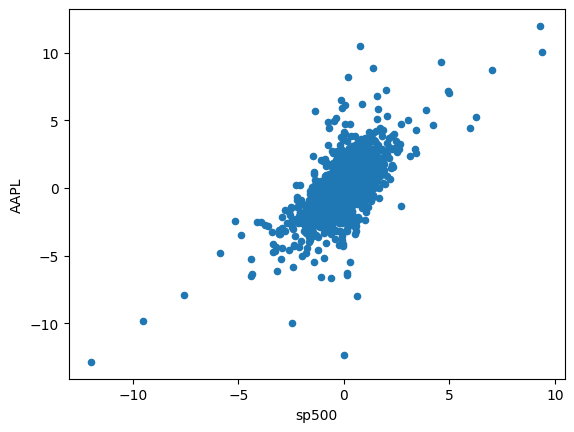

In [25]:
# plot a scatter plot between the selected stock and the S&P500 (Market)
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL')

In [26]:
# Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)

# beta represents the slope of the line regression line (market return vs. stock return).
# Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (S&P500)
# Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets

# Beta = 1.0, this indicates that its price activity is strongly correlated with the market.
# Beta < 1, indicates that the security is theoretically less volatile than the market (Ex: Utility stocks). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.
# Beta > 1, indicates that the security's price is more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market.
# Tech stocks generally have higher betas than S&P500 but they also have excess returns
# MGM is 65% more volatile than the S&P500!


beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['AAPL'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('AAPL', beta, alpha))

Beta for AAPL stock is = 1.1128924148678097 and alpha is = 0.05281208469440288


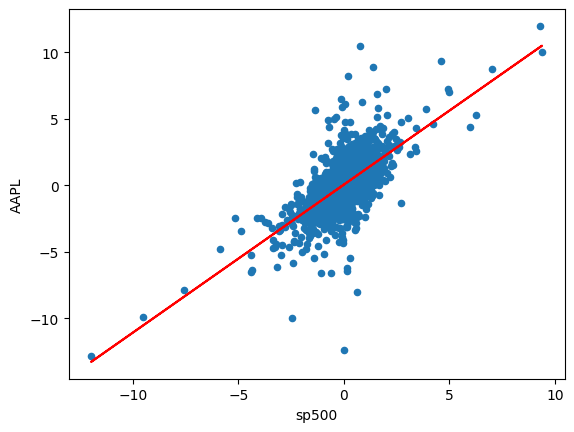

In [27]:
# Now let's plot the scatter plot and the straight line on one plot
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL')

# Straight line equation with alpha and beta parameters
# Straight line equation is y = beta * rm + alpha
plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, '-', color = 'r')


# TASK #5: APPLY THE CAPM FORMULA TO AN INDIVIDUAL STOCK

In [28]:
beta

1.1128924148678097

In [29]:
# Let's calculate the average daily rate of return for S&P500
stocks_daily_return['sp500'].mean()

0.04931600660038915

In [30]:
# Let's calculate the annualized rate of return for S&P500
# Note that out of 365 days/year, stock exchanges are closed for 104 days during weekend days (Saturday and Sunday)
# Check your answers with: https://dqydj.com/sp-500-return-calculator/
rm = stocks_daily_return['sp500'].mean() * 252
rm

12.427633663298066

In [31]:
# Assume risk free rate is zero
# Also you can use the yield of a 10-years U.S. Government bond as a risk free rate
rf = 0

# Calculate return for any security (APPL) using CAPM
ER_AAPL = rf + ( beta * (rm-rf) )

In [32]:
ER_AAPL

13.830619238640267

# TASK #6: CALCULATE BETA FOR ALL STOCKS

In [34]:
def compute_alpha_beta(stocks_daily_return):
    """Compute alpha and beta for each stock relative to S&P 500.

    This function takes a dataframe where each column represents a stock and
    rows represent daily return data points. The function computes alpha and beta
    for each stock relative to S&P 500 by fitting a straight line to the scatter plot
    of the stock's daily returns against S&P 500's daily returns.

    Args:
        stocks_daily_return (pandas.DataFrame): dataframe with each column representing a
        stock and each row a daily return data point in chronological order

    Returns:
        dict, dict: Two dictionaries, the first one maps stock symbols to their computed beta,
        the second one maps stock symbols to their computed alpha.
    """
    # Create placeholders for all betas and alphas (empty dictionaries)
    beta = {}
    alpha = {}

    # Identify stock columns (all columns that are not 'Date' or 'sp500')
    stock_columns = [col for col in stocks_daily_return.columns if col not in ['Date', 'sp500']]

    # Loop on every stock daily return
    for stock in stock_columns:
        # Scatter plot between each individual stock and the S&P500 (Market)
        stocks_daily_return.plot(kind='scatter', x='sp500', y=stock)

        # Fit a polynomial (degree = 1) between each stock and the S&P500.
        # This is equivalent to performing a simple linear regression.
        b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[stock], 1)

        # Plot the line of best fit
        plt.plot(stocks_daily_return['sp500'], b * stocks_daily_return['sp500'] + a, '-', color='r')

        # Store the beta and alpha for each stock
        beta[stock] = b
        alpha[stock] = a

        # Show the plot
        plt.show()

    return beta, alpha

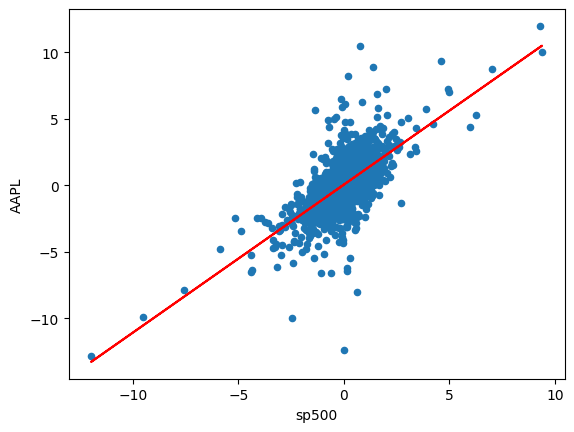

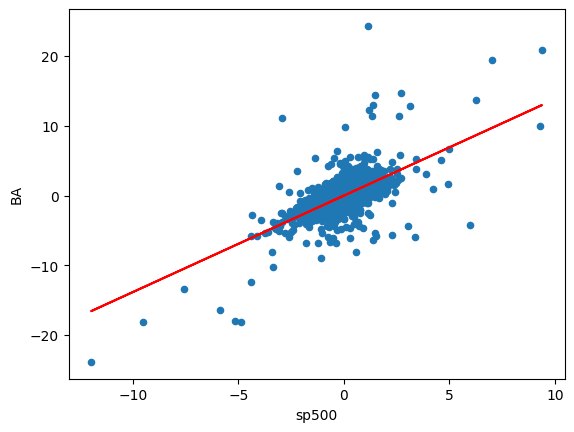

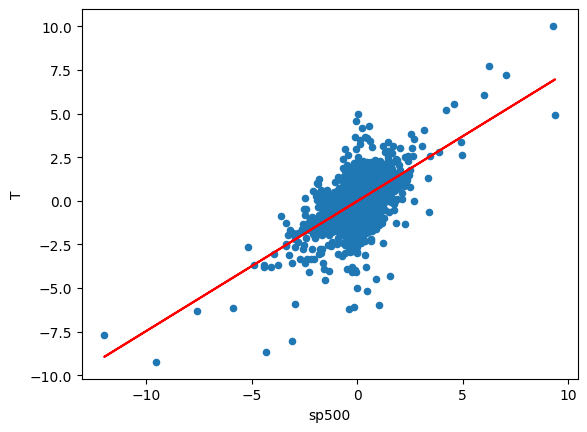

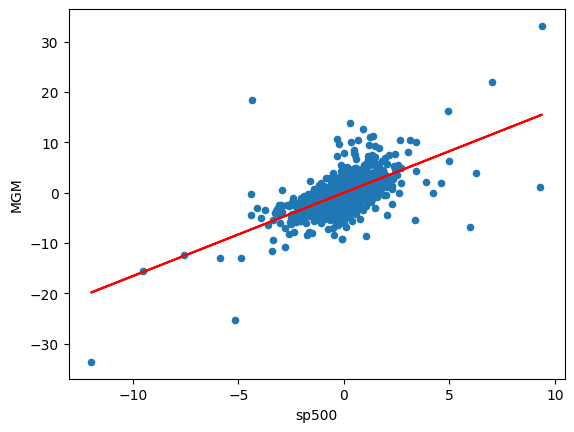

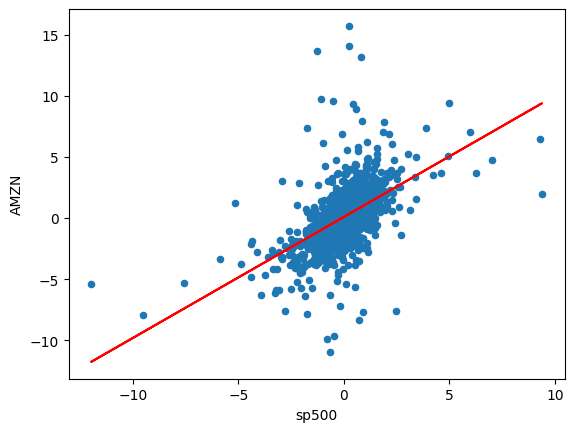

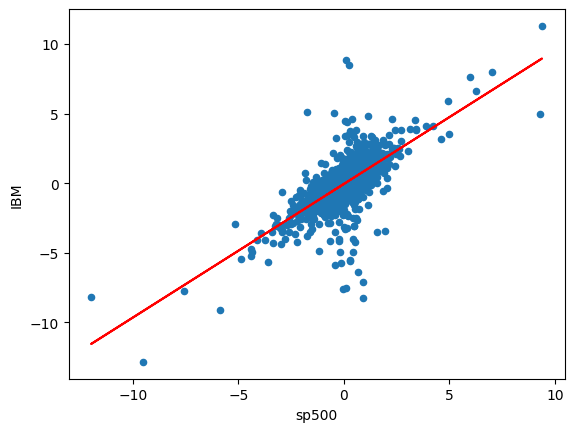

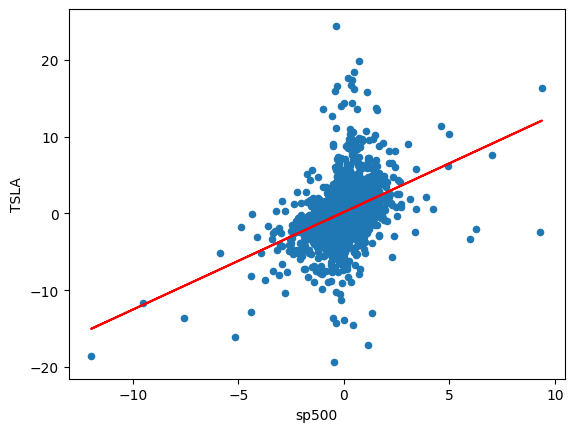

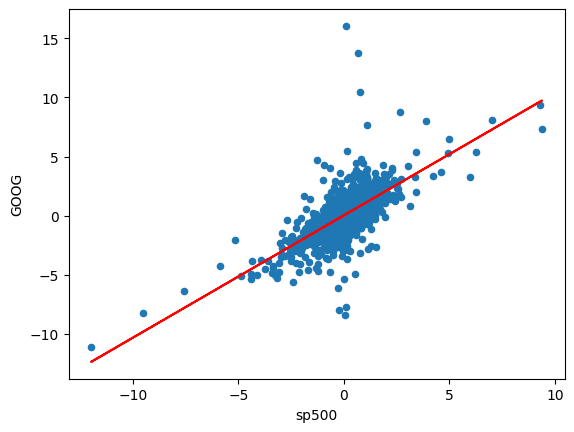

In [35]:
# Let's view Beta for every stock
beta_values, alpha_values = compute_alpha_beta(stocks_daily_return)

In [36]:
# Let's view alpha for each of the stocks
# Alpha describes the strategy's ability to beat the market (S&P500)
# Alpha indicates the “excess return” or “abnormal rate of return,”
# A positive 0.175 alpha for Tesla means that the portfolio’s return exceeded the benchmark S&P500 index by 17%.
alpha_values

{'AAPL': 0.05281208469440288,
 'BA': -0.002290698329752977,
 'T': -0.028563430198461512,
 'MGM': -0.016885305520478545,
 'AMZN': 0.10221396417765283,
 'IBM': -0.05345494150445112,
 'TSLA': 0.17583492165165843,
 'GOOG': 0.03335558721467021}

In [37]:
beta_values

{'AAPL': 1.1128924148678097,
 'BA': 1.3828672010892786,
 'T': 0.7446293454747845,
 'MGM': 1.6535677065180114,
 'AMZN': 0.9917345712576845,
 'IBM': 0.960414914809525,
 'TSLA': 1.2686150101095908,
 'GOOG': 1.0348817687428562}

# TASK #7: APPLYING CAPM FORMULA TO CALCULATE THE EXPECTED RETURNS FOR THE PORTFOLIO

In [45]:
def compute_expected_returns(beta, stocks_daily_return, portfolio_weights):
    """Compute expected returns for each stock and the overall portfolio using CAPM.

    This function uses the Capital Asset Pricing Model (CAPM) to compute the expected
    return for each stock and the overall portfolio. The portfolio is assumed to be
    equally weighted.

    Args:
        beta (dict): Dictionary mapping stock symbols to their beta values.
        stocks_daily_return (pandas.DataFrame): DataFrame with each column representing a
        stock and each row a daily return data point in chronological order.
        portfolio_weights (numpy.ndarray): Array with portfolio weights for each stock.

    Returns:
        dict, float: Dictionary mapping stock symbols to their expected return,
        and a float representing the expected return for the overall portfolio.
    """
    # Obtain a list of all stock names
    stock_symbols = list(beta.keys())

    # Define the expected return dictionary
    expected_returns = {}

    # Assume risk free rate is zero in this case
    risk_free_rate = 0

    # Calculate the expected return of the market (annualized)
    market_return = stocks_daily_return['sp500'].mean() * 252

    for symbol in stock_symbols:
        # Calculate return for every security using CAPM
        expected_returns[symbol] = risk_free_rate + beta[symbol] * (market_return - risk_free_rate)
        print(f'Expected Return Based on CAPM for {symbol} is {expected_returns[symbol]}%')

    print()
    print()
    # Calculate the portfolio return
    portfolio_return = np.sum(np.array(list(expected_returns.values())) * portfolio_weights)
    print(f'Expected Return Based on CAPM for the portfolio is {portfolio_return}%')

    return expected_returns, portfolio_return


In [46]:
# Assume equal weights in the portfolio
portfolio_weights = np.full((8,), 1/8)

# Call function to calculate expected returns
expected_returns, portfolio_return = compute_expected_returns(beta_values, stocks_daily_return, portfolio_weights)

Expected Return Based on CAPM for AAPL is 13.830619238640267%
Expected Return Based on CAPM for BA is 17.185766980127894%
Expected Return Based on CAPM for T is 9.253980720502037%
Expected Return Based on CAPM for MGM is 20.549933694065814%
Expected Return Based on CAPM for AMZN is 12.324913942818474%
Expected Return Based on CAPM for IBM is 11.935684726020396%
Expected Return Based on CAPM for TSLA is 15.765882605403165%
Expected Return Based on CAPM for GOOG is 12.861131506762163%


Expected Return Based on CAPM for the portfolio is 14.213489176792525%


# **MINI CHALLENGES**

**MINI CHALLENGE #1:**
- **Create a function to plot stocks data in an interactive way using Plotly Express**
- **Call the function and visualize the stocks data**
- **Call the function visualize normalized stocks data**
- **Note: Check earlier lectures if you get stuck**

In [49]:
def interactive_plot(df, title):
    """Generates an interactive plot for multiple stock time series.

    This function generates an interactive line plot using the Plotly Express
    library. Each column in the dataframe (except 'Date') is assumed to
    represent a stock, with rows representing chronological data points.

    Args:
        df (pandas.DataFrame): A dataframe where each column (except 'Date')
            represents a stock and rows represent chronological data points.
        title (str): The title of the plot.

    Returns:
        None. The function shows the plot inline.
    """
    # Create an empty figure
    fig = px.line(title=title)

    # Loop through each stock column in the dataframe and add it to the figure
    for column in df.columns:
        # Skip the 'Date' column
        if column != 'Date':
            fig.add_scatter(x=df['Date'], y=df[column], name=column)

    # Display the figure
    fig.show()

In [48]:
# Plot interactive chart
interactive_plot(stocks_df, 'Prices')

In [50]:
# Plot normalized interactive chart
interactive_plot(normalize(stocks_df), 'Normalized Prices')

Cannot convert column 'Date' to numeric data type. Skipping this column.


**MINI CHALLENGE #2:**
- **Which of the following has higher average daily return?**
   - S&P500 or Google
   - S&P500 or Amazon


In [51]:
stocks_daily_return.mean()
# S&P500 average daily return is 0.049%
# Amazon average daily return is 0.15%
# Google average daily return is 0.084%

<ipython-input-51-7c23417b9558>:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



AAPL     0.107695
BA       0.065907
T        0.008159
MGM      0.064662
AMZN     0.151122
IBM     -0.006091
TSLA     0.238398
GOOG     0.084392
sp500    0.049316
dtype: float64

### Thus, S&P500 has higher daily return than both Amazon and Google

**MINI CHALLENGE #3:**
- **Using Plotly Express, plot an interactive plot showing S&P500 daily returns vs. every stock**
- **Plot the best fit straight line (with Alpha and Beta values)**  


In [53]:
import plotly.express as px
import numpy as np

def interactive_beta_plot(df):
    """
    Plot an interactive scatter plot of each stock's daily return vs S&P500 and fit a line.

    Args:
        df (pandas.DataFrame): DataFrame with daily return data for multiple stocks including S&P500.

    Returns:
        None. This function will plot the data.
    """
    # Loop through each stock column in the dataframe
    for column in df.columns:
        # Skip the 'Date' and 'sp500' columns
        if column != 'Date' and column != 'sp500':

            # Create a scatter plot for the stock vs. S&P500 using Plotly Express
            fig = px.scatter(df, x='sp500', y=column, title=column)

            # Calculate the beta (slope) and alpha (intercept) of the line of best fit
            beta, alpha = np.polyfit(df['sp500'], df[column], 1)

            # Add the line of best fit to the scatter plot
            fig.add_scatter(x=df['sp500'], y=beta*df['sp500'] + alpha, mode='lines')

            # Show the figure
            fig.show()

In [54]:
# Use the function to create the plots
interactive_beta_plot(stocks_daily_return)